# Microsoft Movie Analysis Project

### Imported packages

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
con = sqlite3.connect('Data/im.db')
cursor_obj = con.cursor()

### Imported Data sets

In [109]:
mov_gross = pd.read_csv('Data/bom.movie_gross.csv.gz')
tn_movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz')
mov_info = pd.read_table('Data/rt.movie_info.tsv')
reviews = pd.read_table('Data/rt.reviews.tsv', encoding= 'unicode_escape')
rot_tom = pd.read_csv('Data/rotten_tomatoes_movies.csv')
db_mov = pd.read_csv('Data/tmdb.movies.csv.gz', delimiter = ",")

### Looked at each dataset.info() to find the relevant information.

In [110]:
db_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


# Recommendation 1: Genres based on Popularity and Voter Average

## Cleaned The Data
### Exploding the genre column to be able to plot the genres based on its popularity. 

In [111]:
#I found the genre dictionary online for the genre ids and created a dictionary. 
genre_dic = {'Action'      :    28,
'Adventure'    :   12,
'Animation'     :  16,
'Comedy'         : 35,
'Crime'          : 80,
'Documentary'    : 99,
'Drama'          : 18,
'Family'         : 10751,
'Fantasy'        : 14,
'History'        : 36,
'Horror'         : 27,
'Music'          : 10402,
'Mystery'        : 9648,
'Romance'        : 10749,
'Science Fiction' : 878,
'TV Movie'       : 10770,
'Thriller'       : 53,
'War'            : 10752,
'Western'        : 37}


In [112]:
#Switched the keys and values for the dictionary so it was easier to access
#If we inserted the genre id, now we can recieve the genre name.
gd= {str(y): x for x,y in genre_dic.items()}

#any empty lists are replaces as NaN
gd[''] = np.nan

#did a check to see if the id corresponds to the genre value
gd['28']

'Action'

In [113]:
#Deleted the single quotes between the genre id
db_mov['genre_ids'] = db_mov['genre_ids'].apply(lambda x: (x.replace("'", '')))

In [114]:
#Deleted the square brackets
db_mov['genre_ids'] =db_mov['genre_ids'].apply(lambda x: x.replace(']',''))
db_mov['genre_ids'] =db_mov['genre_ids'].apply(lambda x: x.replace('[',''))

In [115]:
#Deleted the commas 
db_mov['genre_ids'] = db_mov['genre_ids'].apply(lambda x: x.split(','))

In [116]:
#Replaced the extra spaces with single spaces
db_mov['genre_ids'] =db_mov['genre_ids'].apply(lambda x: [i.replace(' ','') for i in x])

In [117]:
# for each genre dic item, make i in x (the genre_ids) the same.
db_mov['genre_names']= db_mov['genre_ids'].apply(lambda x: [gd[i]  for i in x])

In [118]:
#explode the genre_names in the dataframe to add a new column and new rows for each genre per movie
exploded_genre_df = db_mov.explode('genre_names')

In [119]:
#print top 5 rows of updated dataframe 
exploded_genre_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure


In [120]:
### Check if the data has any NaNs and how many in each column with a groupby 
exploded_genre_df.isna().sum()

Unnamed: 0              0
genre_ids               0
id                      0
original_language       0
original_title          0
popularity              0
release_date            0
title                   0
vote_average            0
vote_count              0
genre_names          2479
dtype: int64

In [121]:
#remove NaNs with dropna()
exploded_genre_df = exploded_genre_df.dropna()

In [122]:
#check shape of new data frame
exploded_genre_df.shape

(45355, 11)

In [123]:
exploded_genre_df = exploded_genre_df.sort_values(by = 'popularity', ascending = False)

### Created a bar plot for genres grouped by average popularity

/Users/ashfa/miniconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Crime'),
  Text(5, 0, 'Documentary'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Family'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'History'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'Music'),
  Text(12, 0, 'Mystery'),
  Text(13, 0, 'Romance'),
  Text(14, 0, 'Science Fiction'),
  Text(15, 0, 'TV Movie'),
  Text(16, 0, 'Thriller'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Western')])

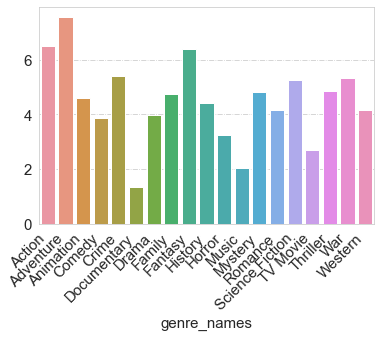

In [124]:
fix, ax = plt.subplots()
sns.barplot(exploded_genre_df.groupby('genre_names')['popularity'].mean().index,
            exploded_genre_df.groupby('genre_names')['popularity'].mean().values)
plt.xticks(rotation=45, ha='right')

/Users/ashfa/miniconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


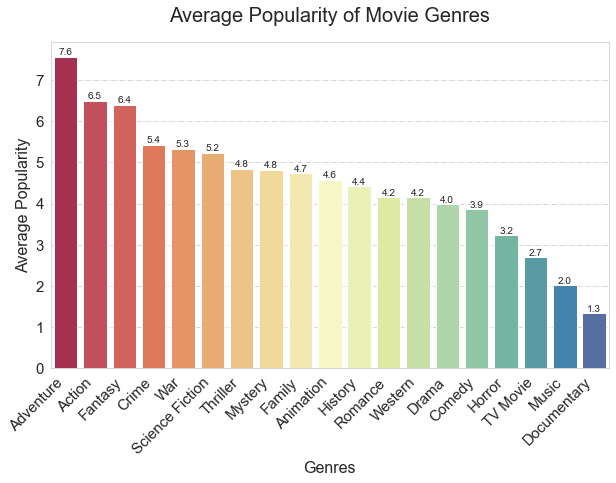

In [211]:
#clean up bar plot
fix, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(exploded_genre_df.groupby('genre_names')['popularity'].mean().sort_values(ascending = False).index,
            exploded_genre_df.groupby('genre_names')['popularity'].mean().sort_values(ascending = False).values,
            palette = "Spectral")
#orient the ticks horizontally          
plt.xticks(rotation=45, ha='right')

#add axis labels and change sizes
plt.xlabel('Genres', fontsize =16)
plt.ylabel('Average Popularity', fontsize =16)
ax.set_title('Average Popularity of Movie Genres', fontsize= 20, pad =20)

#add the y axis values as labels above each bar
for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
    value = '{:.1f}'.format(p.get_height())
    ax.text(_x, _y, value, ha="center", fontsize=10) 

#save figure as jpg
plt.savefig("Average Popularity of Movie Genres.jpg", bbox_inches='tight')


### Create a bar plot for genres grouped by voter average to see any difference (not in presentation, just my investigation)

/Users/ashfa/miniconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


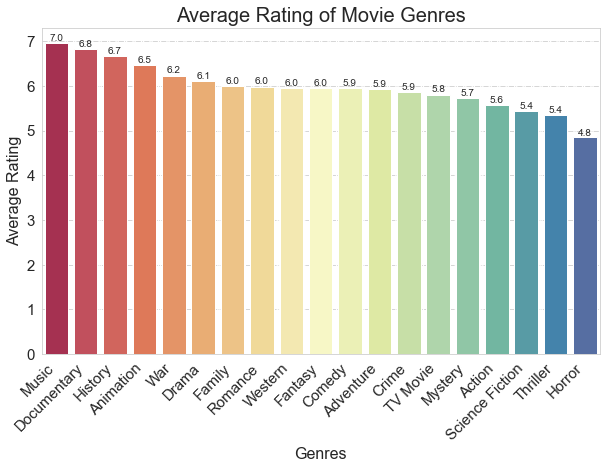

In [210]:
fix, ax = plt.subplots(1,1, figsize=(10,6))
chart1 = sns.barplot(exploded_genre_df.groupby('genre_names')['vote_average'].mean().sort_values(ascending = False).index,
            exploded_genre_df.groupby('genre_names')['vote_average'].mean().sort_values(ascending = False).values,
            palette = "Spectral")
#orient the ticks horizontally              
plt.xticks(rotation=45, ha='right')

#add axis labels and change sizes
chart1.set_title('Average Rating of Movie Genres', fontsize= 25, pad = 20)
plt.xlabel('Genres', fontsize=16);
plt.ylabel('Average Rating', fontsize=16);
ax.set_title('Average Rating of Movie Genres', fontsize = 20)

#add the y axis values as labels above each bar
for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
    value = '{:.1f}'.format(p.get_height())
    ax.text(_x, _y, value, ha="center", fontsize=10) 

#save figure as jpg
plt.savefig("Average Rating of Movie Genres.jpg", bbox_inches='tight')

### Looked at when the most popular genres (Action & Adventure) should be released based month

In [206]:
#created a new column for the corresponding month numerical for each row/ per genre explosion
exploded_genre_df['release_month'] = pd.to_datetime(exploded_genre_df['release_date']).dt.month

In [128]:
#checked to see if any Nan values
exploded_genre_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
genre_names          0
release_month        0
dtype: int64

In [129]:
#checked if new release monthcolumn was made
exploded_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45355 entries, 23811 to 26516
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         45355 non-null  int64  
 1   genre_ids          45355 non-null  object 
 2   id                 45355 non-null  int64  
 3   original_language  45355 non-null  object 
 4   original_title     45355 non-null  object 
 5   popularity         45355 non-null  float64
 6   release_date       45355 non-null  object 
 7   title              45355 non-null  object 
 8   vote_average       45355 non-null  float64
 9   vote_count         45355 non-null  int64  
 10  genre_names        45355 non-null  object 
 11  release_month      45355 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.5+ MB


In [130]:
#created a conditional statement so a new variable could have the wanted dataframe with only action and adventure ad fantasy
exploded_genre = exploded_genre_df.loc[(exploded_genre_df['genre_names'] == "Adventure") | (exploded_genre_df['genre_names'] == "Action")| (exploded_genre_df['genre_names'] == "Fantasy")] 

In [131]:
#checked the index fi it starts with 0
exploded_genre.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names,release_month
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Adventure,4
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Action,4
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Fantasy,4
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,Action,10
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,Action,12


In [132]:
#reset the index of the dataframe after the conditional statement
genre_month_pop = exploded_genre.groupby(["release_month",'genre_names'])['popularity'].mean().reset_index()

In [133]:
#made labels for the corresponding months and also applied a function to reset the index
labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
genre_month_pop['month'] = genre_month_pop['release_month'].apply(lambda x: labels[int(x) -1])
genre_month_pop

,release_month,genre_names,popularity,month
0,1,Action,4.914279,Jan
1,1,Adventure,3.941440,Jan
2,1,Fantasy,4.024784,Jan
3,2,Action,6.993472,Feb
4,2,Adventure,7.388725,Feb
5,2,Fantasy,6.898474,Feb
6,3,Action,6.244089,Mar
7,3,Adventure,7.911911,Mar
8,3,Fantasy,7.593937,Mar
9,4,Action,5.557393,Apr


### Created a line plot to see when the most popular genre of movies should be releases

<ipython-input-134-b3539acc36c5>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


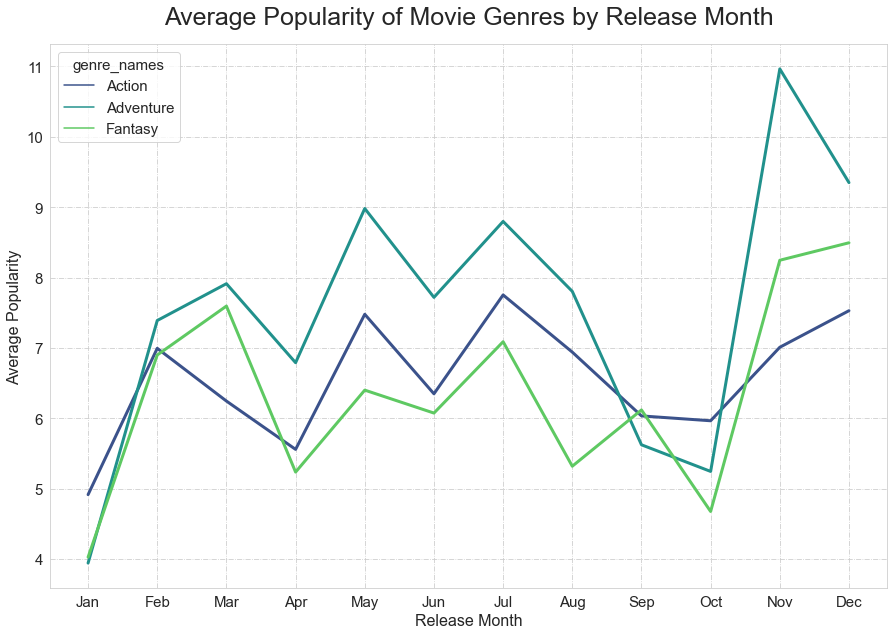

In [134]:

fix, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x = "month", y = "popularity", data= genre_month_pop,
             hue = "genre_names",
             palette = "viridis",
             linewidth = 3)
plt.xlabel('Release Month', fontsize =16)
plt.ylabel('Average Popularity', fontsize =16)
ax.set_title('Average Popularity of Movie Genres by Release Month', fontsize= 25, pad =20)
ax.set_xticklabels(labels)

#save figure as jpg
plt.savefig("Average popularity of movie by release month.jpg", bbox_inches='tight')

### Made a scatterplot to see if average rating and average popularity have a correlation - they dont (not in presentation)

/Users/ashfa/miniconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


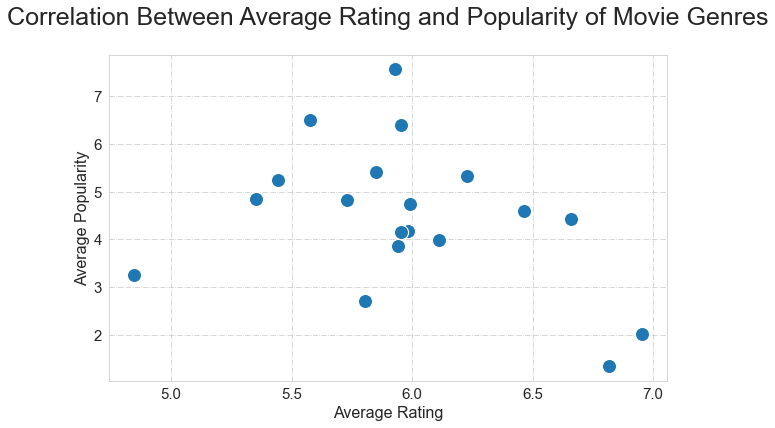

In [135]:
fix, ax = plt.subplots(1,1, figsize=(10,6))
chart = sns.scatterplot(exploded_genre_df.groupby('genre_names')['vote_average'].mean().values,
            exploded_genre_df.groupby('genre_names')['popularity'].mean().values,
            palette = "Spectral",
            s = 200)
#added axis labels and changed size and color
chart.set_title('Correlation Between Average Rating and Popularity of Movie Genres', fontsize= 25, pad=30)
plt.xlabel('Average Rating', fontsize = 16)
plt.ylabel('Average Popularity', fontsize = 16)

#save figure as jpg
plt.savefig("average rating and average popularity.jpg", bbox_inches='tight')


### Sorted the exploded db_mov based on highest to lowest popularity, as a check

In [136]:
exploded_genre_df.sort_values(by = 'popularity', ascending = False)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names,release_month
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Adventure,4
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Fantasy,4
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Action,4
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,Thriller,10
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,Action,10
...,...,...,...,...,...,...,...,...,...,...,...,...
10250,10250,"[12, 16, 35, 10751, 14, 27, 10770]",213121,en,Toy Story of Terror!,0.600,2014-08-19,Toy Story of Terror!,7.1,413,Family,8
10250,10250,"[12, 16, 35, 10751, 14, 27, 10770]",213121,en,Toy Story of Terror!,0.600,2014-08-19,Toy Story of Terror!,7.1,413,Comedy,8
10250,10250,"[12, 16, 35, 10751, 14, 27, 10770]",213121,en,Toy Story of Terror!,0.600,2014-08-19,Toy Story of Terror!,7.1,413,Animation,8
10250,10250,"[12, 16, 35, 10751, 14, 27, 10770]",213121,en,Toy Story of Terror!,0.600,2014-08-19,Toy Story of Terror!,7.1,413,Adventure,8


### Looked at Rotten Tomato dataset, cleaned the data and exploded the genres 

In [137]:
rot_tom.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [138]:
#check how many columns and rows the dataset has before cleaning
rot_tom.shape

(17712, 22)

In [139]:
#Turned the genres which were a coninuous string into lists
rot_tom['genre_names'] = rot_tom['genres'].str.split(',')

In [140]:
#exploded the genre names as a new column and created a new variable for the dataframe
rt_explode = rot_tom.explode('genre_names')

In [141]:
#Check to see if new column is added
rt_explode.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'genre_names'],
      dtype='object')

In [142]:
#check how many new rows it made, should be more than before. Columns should be the same, just more rows.
rt_explode.shape

(39388, 23)

In [143]:
#explode the genre names column and groupby genre and its corresponding rotten tomato rating and take the mean of that
rt_explode.groupby('genre_names')['tomatometer_rating'].mean().sort_values(ascending = False)

genre_names
Special Interest              83.333333
Documentary                   81.679070
Classics                      79.120721
 Special Interest             77.463217
 Documentary                  77.208211
 Classics                     76.865922
 Anime & Manga                75.368421
 Television                   72.574627
Art House & International     71.829450
 Musical & Performing Arts    71.010152
 Sports & Fitness             71.005618
Musical & Performing Arts     70.730769
 Western                      68.575342
 Art House & International    67.589099
 Drama                        65.517241
Western                       65.000000
 Animation                    64.400000
 Faith & Spirituality         63.886076
Animation                     63.882979
 Cult Movies                  63.573171
 Comedy                       61.928058
 Romance                      60.579031
Kids & Family                 59.891304
Drama                         59.766870
Science Fiction & Fantasy   

In [144]:
rt_explode = rt_explode.head(50)

### Made a scatterplot of the average audience rating and critic rating to see any discrepency (not in presentation)


/Users/ashfa/miniconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


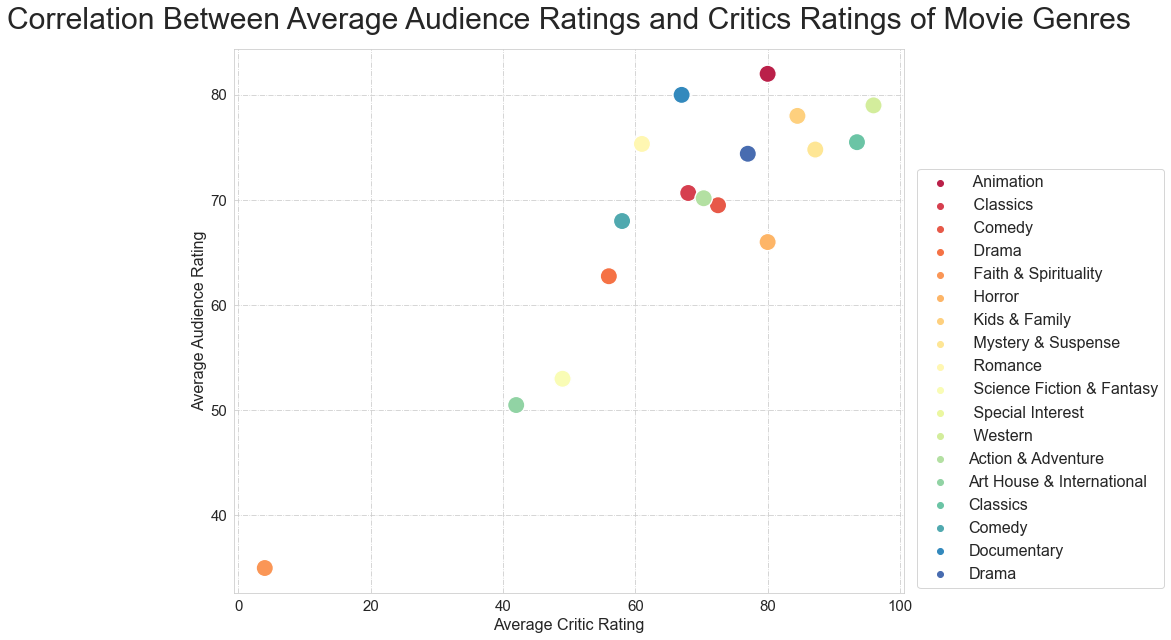

In [145]:
fix, ax = plt.subplots(1,1, figsize=(12,10))
chart = sns.scatterplot(rt_explode.groupby('genre_names')['tomatometer_rating'].mean().values,
                rt_explode.groupby('genre_names')['audience_rating'].mean().values,
                hue = rt_explode.groupby('genre_names')['audience_rating'].mean().index,
                s=300,
                palette = "Spectral")
chart.set_title('Correlation Between Average Audience Ratings and Critics Ratings of Movie Genres', fontsize= 30, pad=20)

#Create axis labels
plt.xlabel('Average Critic Rating', fontsize=16);
plt.ylabel('Average Audience Rating', fontsize=16);

#move the legend to the lower right side
plt.legend(bbox_to_anchor=(1.02, 0.78), loc='upper left', borderaxespad=0, fontsize = 16)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})
#for i in range(rt_explode.groupby('genre_names')['tomatometer_rating'].mean().size):
    #plt.text(x=rt_explode.groupby('genre_names')['tomatometer_rating'].mean()[i]+0.2,
            #y=rt_explode.groupby('genre_names')['audience_rating'].mean()[i]+0.2,
             #s=rt_explode.groupby('genre_names')['tomatometer_rating'].mean().index[i])

#save figure as jpg
plt.savefig("output.jpg", bbox_inches='tight')

### We made this plot to see if there is a discrepency between audience rating and critic ratings. this plot shows there is a clear correlation between the two 

## Recommendation 2: Highest ROI Genres and Months

### SQL Query Data Pull

In [146]:
cursor_obj.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
im_table_names = cursor_obj.fetchall()
im_table_names
#Fetching all SQL table names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [147]:
movie_basics_query = pd.read_sql("""
SELECT primary_title,start_year,runtime_minutes,genres
    FROM movie_basics
;
""", con)
#Pulling specific columns from movie_basics SQL table

In [148]:
movie_basics = pd.DataFrame(movie_basics_query)
movie_basics
#Converting query to dataframe format

,primary_title,start_year,runtime_minutes,genres
0,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,2018,122.0,Drama
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,Dankyavar Danka,2013,NaN,Comedy
146142,6 Gunn,2017,116.0,None


### Formatting CSV Data

In [149]:
tn_movie_budgets["production_budget"] = tn_movie_budgets["production_budget"].str.replace("$","").str.replace(",","").astype(int)
#Stripping column of characters and converting to integers

In [150]:
tn_movie_budgets["domestic_gross"] = tn_movie_budgets["domestic_gross"].str.replace("$","").str.replace(",","").astype(int)

In [151]:
tn_movie_budgets["worldwide_gross"] = tn_movie_budgets["worldwide_gross"].str.replace("$","").str.replace(",","").astype("int64")

In [152]:
tn_movie_budgets["ROI"] = (tn_movie_budgets["worldwide_gross"] - tn_movie_budgets["production_budget"]) / tn_movie_budgets["production_budget"]
#Creating ROI column with ROI formula as the input

In [153]:
tn_movie_budgets["release_date"] = pd.to_datetime(tn_movie_budgets["release_date"])
#Converting release date column to date-time format

In [154]:
tn_movie_budgets['year'] = tn_movie_budgets['release_date'].dt.year
tn_movie_budgets
#Creating year column from release_date column

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,5.532577,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.546673,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-0.572108,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,3.243841,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.153696,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,-1.000000,2018
5778,79,1999-04-02,Following,6000,48482,240495,39.082500,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-0.732400,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1.000000,2015


### Merging SQL Query With Budgets CSV

In [155]:
merged = movie_basics.merge(tn_movie_budgets , how = 'inner' ,right_on= ['movie', 'year'], left_on = ['primary_title','start_year' ])
#Merging SQL movie_basics df with tn_movie_budgets df

In [156]:
budgets_and_genres = merged.sort_values(by = "ROI",ascending = False)
#Sorting by highest ROI

### Dropping Null Values

In [157]:
budgets_and_genres.dropna(inplace = True)
#Dropping null values

### Seperating Genres into Individual Rows to Get Mean ROI For Each

In [158]:
budgets_and_genres["genres"] = budgets_and_genres["genres"].str.split(",")
#Turning genre column rows into lists

In [159]:
budgets_and_genres_explode = budgets_and_genres[['primary_title', 'genres','ROI']].explode('genres')
#Exploding merged table based on genre to get individual rows of movies and their seperate genres with the same index

In [160]:
budgets_and_genres_explode.groupby(by="genres").mean("ROI")
#Grouping results by genre along with their mean ROI

,ROI
genres,
Action,1.599989
Adventure,2.084312
Animation,2.674419
Biography,2.381621
Comedy,2.151968
Crime,1.149873
Documentary,1.935229
Drama,2.151777
Family,1.545830


### Finding and Removing Outliers within Merged Data

/Users/ashfa/miniconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ROI'>

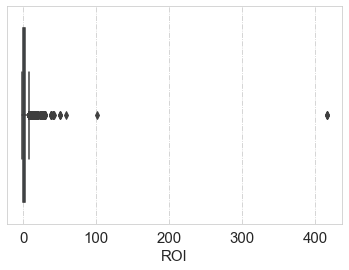

In [161]:
sns.boxplot(budgets_and_genres_explode['ROI'])
#Using boxplot to determine ROI outliers in the data

In [162]:
outliers_remove = budgets_and_genres_explode.drop(budgets_and_genres_explode[(budgets_and_genres_explode["ROI"] > 100) | (budgets_and_genres_explode["ROI"] < 0)].index)
outliers_remove
#Removing outliers with ROI > 100 and ROI < 0 

,primary_title,genres,ROI
485,Paranormal Activity 2,Horror,58.170677
1431,Get Out,Horror,50.073590
1431,Get Out,Mystery,50.073590
1431,Get Out,Thriller,50.073590
1423,Moonlight,Drama,42.497008
...,...,...,...
634,Stoker,Drama,0.002909
634,Stoker,Thriller,0.002909
112,Hugo,Adventure,0.000265
112,Hugo,Drama,0.000265


### Determining Mean ROI Per Genre

In [163]:
mean_ROI = outliers_remove.groupby(by="genres").mean("ROI")
mean_ROI
#Creating mean ROI per movie genre table

,ROI
genres,
Action,2.441660
Adventure,2.559687
Animation,3.043752
Biography,3.908969
Comedy,3.038640
Crime,2.127588
Documentary,3.863989
Drama,3.705758
Family,2.248962


### Graphing the Data for Mean ROI Per Genre

/Users/ashfa/miniconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


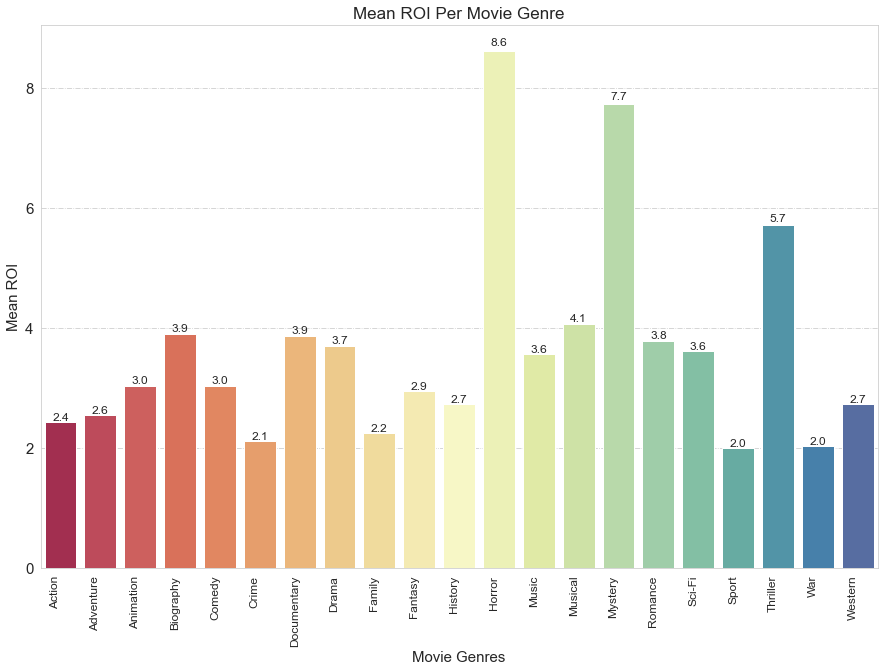

In [164]:
fix, ax = plt.subplots(figsize=(15,10))
sns.barplot(outliers_remove.groupby(by="genres")["ROI"].mean().index,
            outliers_remove.groupby(by="genres")["ROI"].mean().values,
           palette = "Spectral")
plt.xticks(rotation=90, ha='right', fontsize = 12)
plt.xlabel("Movie Genres",fontsize = 15)
plt.ylabel("Mean ROI",fontsize = 15)
ax.set_title("Mean ROI Per Movie Genre",fontsize = 17)

for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
    value = '{:.1f}'.format(p.get_height())
    ax.text(_x, _y, value, ha="center",fontsize = 12)
    
#Grpahing Mean ROI per genre

### Adding Mean Production Budget Information

In [165]:
budgets_and_genres_prod = budgets_and_genres[['primary_title', 'genres','production_budget','ROI']].explode('genres')
production = budgets_and_genres_prod.drop(budgets_and_genres_prod[(budgets_and_genres_prod["ROI"] > 100) | (budgets_and_genres_prod["ROI"] < 0)].index)
# Adding production data to table and removing outliers

/Users/ashfa/miniconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-166-aec19c58b08f>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


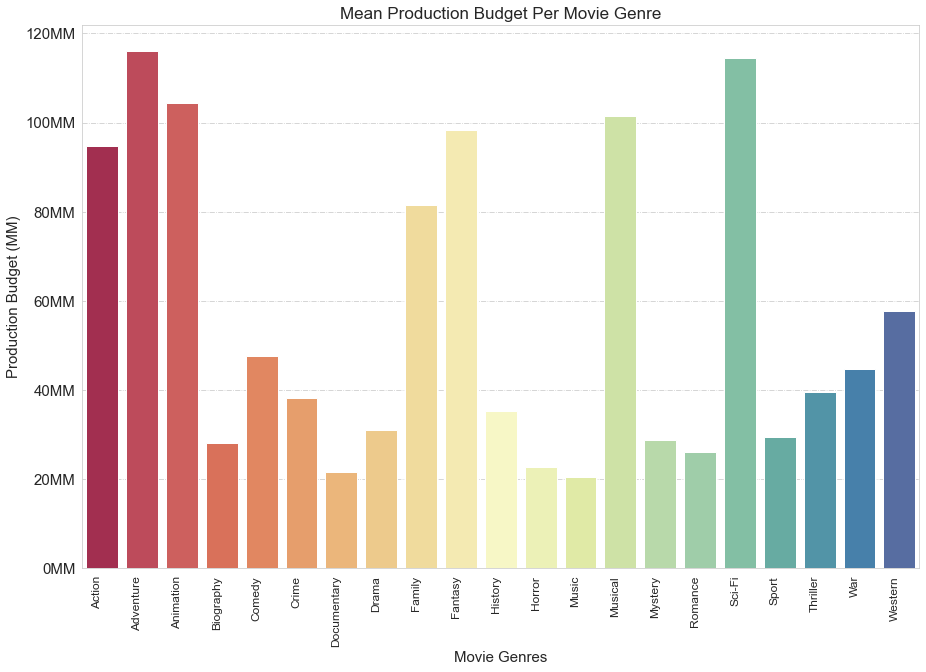

In [166]:
labels = ["0MM","20MM","40MM","60MM","80MM","100MM","120MM"]
fix, ax = plt.subplots(figsize=(15,10))
sns.barplot(production.groupby(by="genres")["production_budget"].mean().index,
            production.groupby(by="genres")["production_budget"].mean().values,
           palette = "Spectral")
plt.xticks(rotation=90, ha='right', fontsize = 12)
plt.xlabel("Movie Genres",fontsize = 15)
plt.ylabel("Production Budget (MM)",fontsize = 15)
ax.set_yticklabels(labels)
ax.set_title("Mean Production Budget Per Movie Genre",fontsize = 17)

plt.savefig("Mean Production Budget Per Movie genre.jpg")

#Graphing mean production budget per movie genre

### Adding Release Date to Data and Seperating by Month

In [167]:
months_genres_explode = budgets_and_genres[['primary_title', 'genres', 'ROI',"release_date"]].explode('genres')
months_genres_explode = months_genres_explode.drop(budgets_and_genres[(budgets_and_genres["ROI"] > 100) | (budgets_and_genres["ROI"] < 0)].index)
#Exploding rows based on genres and removing outliers from ROI

In [168]:
months_genres_explode["month"] = months_genres_explode["release_date"].dt.strftime("%m")
months_genres_explode["month"].value_counts()
#Seperating month from release date

11    285
12    273
10    259
07    259
09    240
08    239
03    235
06    227
05    200
04    196
02    190
01    138
Name: month, dtype: int64

### Grouping Data by Month to Get Mean ROI

In [169]:
mean_ROI_months = months_genres_explode.groupby(by="month").mean("ROI")
mean_ROI_months
#Grouping mean ROI by month

,ROI
month,
01,3.431729
02,4.004704
03,2.962870
04,3.107587
05,3.161290
06,3.879032
07,4.668562
08,2.948467
09,3.260842


### Graphing Mean ROI Across Months

/Users/ashfa/miniconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-170-73ac15feb87a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

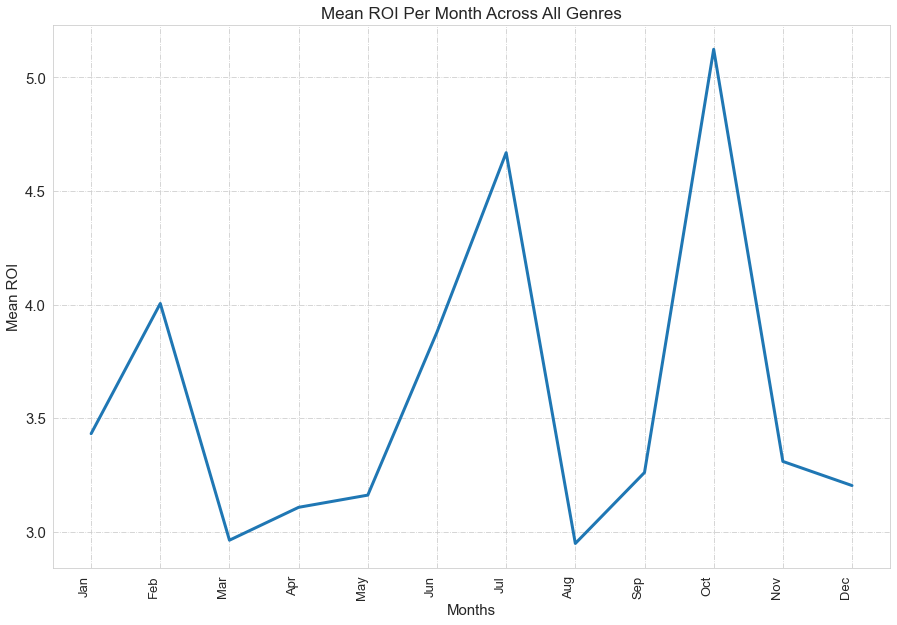

In [170]:
labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

fix, ax = plt.subplots(figsize=(15,10))
sns.lineplot(months_genres_explode.groupby(by="month")["ROI"].mean().index,
            months_genres_explode.groupby(by="month")["ROI"].mean().values,
            linewidth = 3)
plt.xticks(rotation=90, ha='right',fontsize = 13)
plt.xlabel("Months",fontsize = 15)
plt.ylabel("Mean ROI", fontsize = 15)
ax.set_title("Mean ROI Per Month Across All Genres",fontsize = 17)
ax.set_xticklabels(labels)

#Graphing Mean ROI Across Months

# RECOMMENDATION 3: ACTORS BASED ON POPULARITY

CREATING A TABLE WITH ACTORS/ACTRESS AND THEIR NAMES

In [171]:
#loading and specifying columns in principals table
persons_ = pd.read_sql("""
SELECT movie_id, person_id, category
FROM principals
WHERE category = 'actor' OR category = 'actress';
""", con)

In [172]:
#loading and specifying columns in persons table
persons_name = pd.read_sql("""
SELECT person_id, primary_name, primary_profession
FROM persons
WHERE primary_profession = 'actor' OR primary_profession = 'actress'
""", con)

In [173]:
#converting tables to PD DataFrame
persons_df = pd.DataFrame(persons_)
persons_name_df = pd.DataFrame(persons_name)

In [174]:
#merging both DataFrames based on common column: person_id
merged_df = pd.merge(persons_, persons_name, on = 'person_id')

In [175]:
merged_df.drop(columns = 'primary_profession', inplace = True)

Adding Movie_basics table & ratings table to the dataframe

In [176]:
#adding movie basics to a dataframe
movie_info = pd.read_sql("""
SELECT * FROM movie_basics;
""", con)

In [177]:
movies = pd.DataFrame(movie_info)

In [178]:
#removing null values
movies.dropna(axis = 0, inplace = True)

In [179]:
#merging movie dataframe 
movies_actors = pd.merge(merged_df, movies, on = 'movie_id')

In [180]:
#adding movie ratings to a dataframe
ratings = pd.read_sql("""
SELECT * FROM movie_ratings
""", con)

In [181]:
movie_ratings = pd.DataFrame(ratings)

In [182]:
#merging dataframes w. dataframe that was made with actors/actresses info
ratings_mov = pd.merge(movies_actors, movie_ratings, on = 'movie_id')

ADDING MOVIE GROSS VALUES TO THE TABLE

In [183]:
movie_full = pd.merge(ratings_mov, tn_movie_budgets, left_on = 'primary_title', right_on = 'movie')
movie_full

,movie_id,person_id,category,primary_name,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,year
0,tt1083452,nm8030441,actor,Tom Costello,Eddie the Eagle,Eddie the Eagle,2015,106.0,"Biography,Comedy,Drama",7.4,75331,86,2016-02-26,Eddie the Eagle,23000000,15789389,45060480,0.959151,2016
1,tt1124037,nm0991810,actor,Mahershala Ali,Free State of Jones,Free State of Jones,2016,139.0,"Action,Biography,Drama",6.9,45135,81,2016-06-24,Free State of Jones,50000000,20810036,23237252,-0.535255,2016
2,tt0437086,nm0991810,actor,Mahershala Ali,Alita: Battle Angel,Alita: Battle Angel,2019,122.0,"Action,Adventure,Sci-Fi",7.5,88207,24,2019-02-14,Alita: Battle Angel,170000000,85710210,402976036,1.370447,2019
3,tt0437086,nm0000124,actress,Jennifer Connelly,Alita: Battle Angel,Alita: Battle Angel,2019,122.0,"Action,Adventure,Sci-Fi",7.5,88207,24,2019-02-14,Alita: Battle Angel,170000000,85710210,402976036,1.370447,2019
4,tt4975722,nm0991810,actor,Mahershala Ali,Moonlight,Moonlight,2016,111.0,Drama,7.4,227964,64,2016-10-21,Moonlight,1500000,27854931,65245512,42.497008,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,tt7535280,nm9358590,actor,Andrei Zagorodnii,Teeth,Dintii,2017,71.0,Drama,8.8,25,48,2008-01-18,Teeth,2000000,347578,2350641,0.175320,2008
2869,tt8662424,nm9953795,actress,Toni Allan,Never Again,Never Again,2017,106.0,Drama,5.7,67,47,2002-07-12,Never Again,500000,307631,308793,-0.382414,2002
2870,tt8662424,nm9953794,actress,Kelly Baxter,Never Again,Never Again,2017,106.0,Drama,5.7,67,47,2002-07-12,Never Again,500000,307631,308793,-0.382414,2002
2871,tt8662424,nm9953791,actor,Hawt Carl,Never Again,Never Again,2017,106.0,Drama,5.7,67,47,2002-07-12,Never Again,500000,307631,308793,-0.382414,2002


USING EXPLODE METHOD TO SEPARATE MULTIPLE GENRE VALUES FROM THE GENRE COLUMN

In [184]:
movie_full['genres'] = movie_full['genres'].apply(lambda x: x.split(','))

In [185]:
movie_info_ = movie_full.explode('genres')

In [186]:
#dropping columns that are not needed
movie_info_.drop(['original_title', 'runtime_minutes', 'id', 'movie'], axis=1)

,movie_id,person_id,category,primary_name,primary_title,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,year
0,tt1083452,nm8030441,actor,Tom Costello,Eddie the Eagle,2015,Biography,7.4,75331,2016-02-26,23000000,15789389,45060480,0.959151,2016
0,tt1083452,nm8030441,actor,Tom Costello,Eddie the Eagle,2015,Comedy,7.4,75331,2016-02-26,23000000,15789389,45060480,0.959151,2016
0,tt1083452,nm8030441,actor,Tom Costello,Eddie the Eagle,2015,Drama,7.4,75331,2016-02-26,23000000,15789389,45060480,0.959151,2016
1,tt1124037,nm0991810,actor,Mahershala Ali,Free State of Jones,2016,Action,6.9,45135,2016-06-24,50000000,20810036,23237252,-0.535255,2016
1,tt1124037,nm0991810,actor,Mahershala Ali,Free State of Jones,2016,Biography,6.9,45135,2016-06-24,50000000,20810036,23237252,-0.535255,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,tt7535280,nm9358590,actor,Andrei Zagorodnii,Teeth,2017,Drama,8.8,25,2008-01-18,2000000,347578,2350641,0.175320,2008
2869,tt8662424,nm9953795,actress,Toni Allan,Never Again,2017,Drama,5.7,67,2002-07-12,500000,307631,308793,-0.382414,2002
2870,tt8662424,nm9953794,actress,Kelly Baxter,Never Again,2017,Drama,5.7,67,2002-07-12,500000,307631,308793,-0.382414,2002
2871,tt8662424,nm9953791,actor,Hawt Carl,Never Again,2017,Drama,5.7,67,2002-07-12,500000,307631,308793,-0.382414,2002


ADVENTURE MOVIES

In [187]:
#Grouping together all adventure movies and creating a list of actors who have the most
# data in the table. 
adv_movies = movie_info_[(movie_info_['genres'] == 'Adventure')]
adv_counts = adv_movies['primary_name'].value_counts().sort_values(ascending = False, inplace = False).head(5)
adv_counts

Mark Strong          4
Matthew Macfadyen    3
Asa Butterfield      3
Karl Urban           3
Kodi Smit-McPhee     3
Name: primary_name, dtype: int64

In [188]:
# Creating a new table from the list of actors to use for plotting
adv_1 = adv_movies[(adv_movies['primary_name'] == 'Mark Strong')]
adv_2 = adv_movies[(adv_movies['primary_name'] == 'Asa Butterfield')]
adv_3 = adv_movies[(adv_movies['primary_name'] == 'Karl Urban')]
adv_4 = adv_movies[(adv_movies['primary_name'] == 'Matthew Macfadyen')]
adv = pd.concat([adv_1.assign(dataset='adv_1'),adv_2.assign(dataset='adv_2'), 
                 adv_3.assign(dataset='adv_3'), adv_4.assign(dataset='adv_4')])

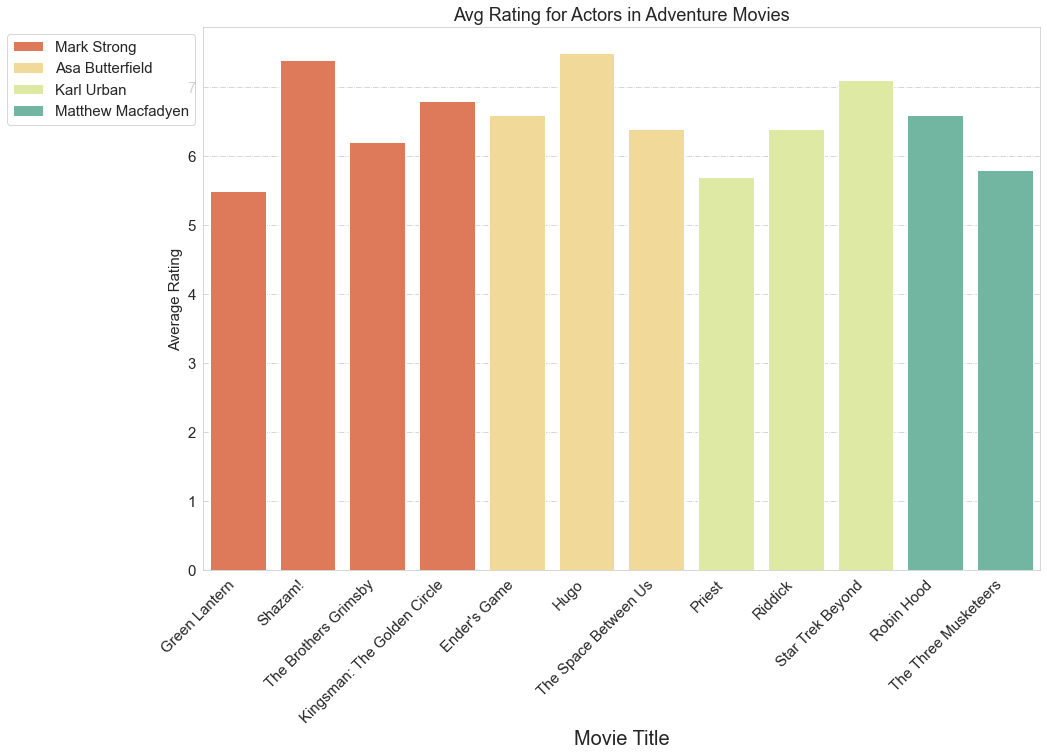

In [189]:
plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize = (15,10))

sns.barplot(x = 'primary_title', y = 'averagerating', hue = 'primary_name',data = adv, palette = "Spectral", dodge = False)
ax.set_xlabel('Movie Title', fontdict={'fontsize':20} )
ax.set_ylabel('Average Rating')
ax.set_title('Avg Rating for Actors in Adventure Movies')

plt.legend(loc='upper right', bbox_to_anchor = (0,1))

plt.xticks(rotation=45, ha='right')
 
plt.show()

ACTION MOVIES

In [190]:
#Grouping together all adventure movies and creating a list of actors who have the most
# data in the table. 
act_movies = movie_info_[(movie_info_['genres'] == 'Action')]
act_counts = act_movies['primary_name'].value_counts().sort_values(ascending = False, inplace = False).head(5)
act_counts

Mark Strong          4
David Harbour        4
Karl Urban           4
Henry Cavill         4
Jennifer Connelly    4
Name: primary_name, dtype: int64

In [191]:
# Creating a new table from the list of actors to use for plotting
act_1 = act_movies[(act_movies['primary_name'] == 'Jennifer Connelly')]
act_2 = act_movies[(act_movies['primary_name'] == 'Henry Cavill')]
act_3 = act_movies[(act_movies['primary_name'] == 'David Harbour')]
act_4 = act_movies[(act_movies['primary_name'] == 'Mark Strong')]
act = pd.concat([act_1.assign(dataset='act_1'),act_2.assign(dataset='act_2'), 
                 act_3.assign(dataset='act_3'), act_4.assign(dataset='act_4')])

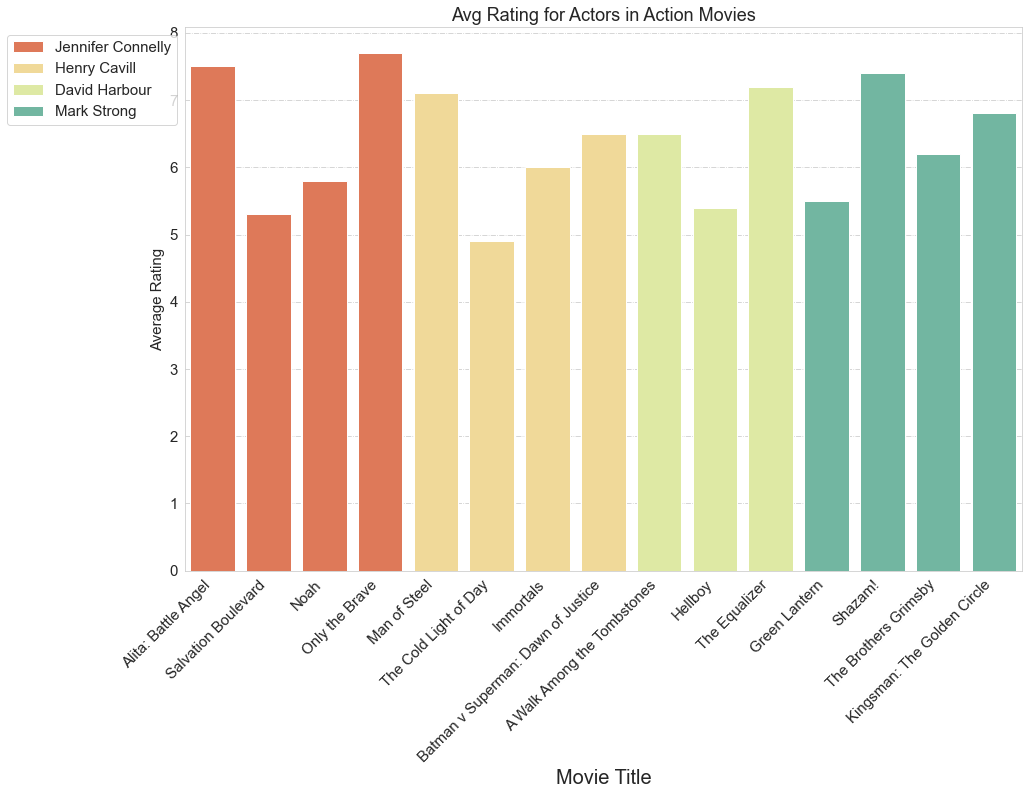

In [192]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize = (15,10))

sns.barplot(x = 'primary_title', y = 'averagerating', hue = 'primary_name',data = act, palette = "Spectral", dodge = False)
ax.set_xlabel('Movie Title', fontdict={'fontsize':20} )
ax.set_ylabel('Average Rating')
ax.set_title('Avg Rating for Actors in Action Movies')

plt.legend(loc='upper right', bbox_to_anchor = (0,1))

plt.xticks(rotation=45, ha='right')
 
plt.show()

HORROR MOVIES

In [193]:
#Grouping together all adventure movies and creating a list of actors who have the most
# data in the table. 
hor_movies = movie_info_[(movie_info_['genres'] == 'Horror')]
hor_counts = hor_movies['primary_name'].value_counts().sort_values(ascending = False, inplace = False).head(5)
hor_counts

Alessandra Shelby Farmer    3
Kerry Knuppe                3
Anya Taylor-Joy             3
Gabriella Wilde             2
Rebecca Ferguson            2
Name: primary_name, dtype: int64

In [194]:
# Creating a new table from the list of actors to use for plotting
hor_1 = hor_movies[(hor_movies['primary_name'] == 'Tiffany-Ellen Robinson')]
hor_2 = hor_movies[(hor_movies['primary_name'] == 'Anya Taylor-Joy')]
hor_3 = hor_movies[(hor_movies['primary_name'] == 'Alessandra Shelby Farmer')]
hor_4 = hor_movies[(hor_movies['primary_name'] == 'Richard Jenkins')]
hor = pd.concat([hor_1.assign(dataset='hor_1'),hor_2.assign(dataset='hor_2'), 
                 hor_3.assign(dataset='hor_3'), hor_4.assign(dataset='hor_4')])

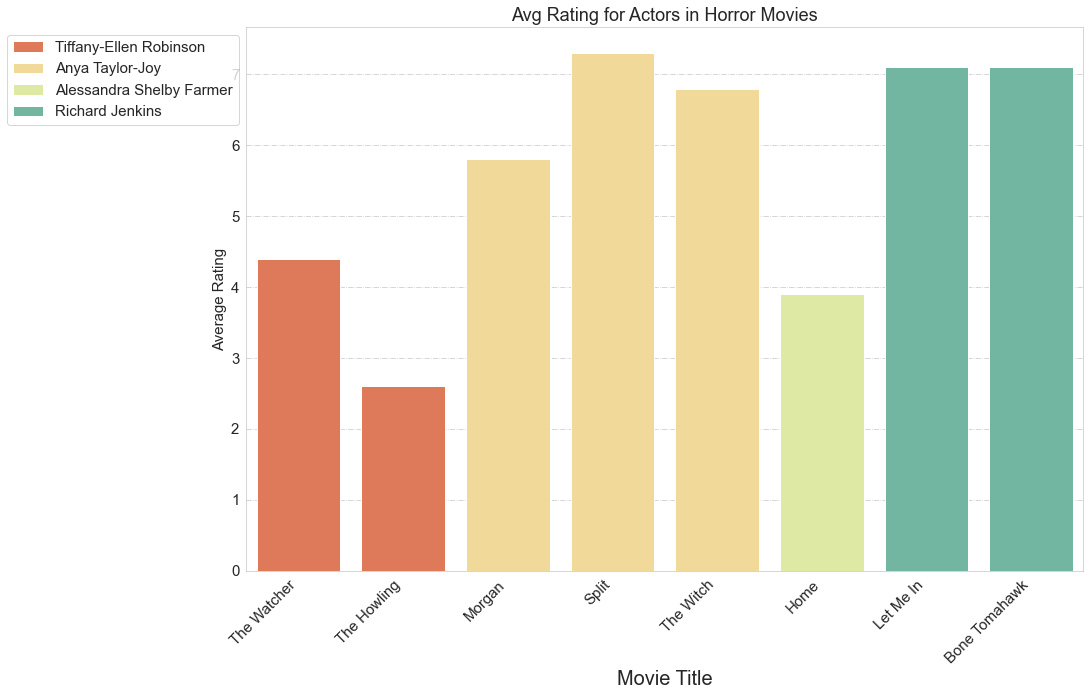

In [195]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize = (15,10))

sns.barplot(x = 'primary_title', y = 'averagerating', hue = 'primary_name',data = hor, palette = "Spectral", dodge = False)
ax.set_xlabel('Movie Title', fontdict={'fontsize':20} )
ax.set_ylabel('Average Rating')
ax.set_title('Avg Rating for Actors in Horror Movies')

plt.legend(loc='upper right', bbox_to_anchor = (0,1))

plt.xticks(rotation=45, ha='right')
 
plt.show()